#Zone 19

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install dask[dataframe]

     |████████████████████████████████| 112kB 14.0MB/s 


In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import time

file = '/content/drive/MyDrive/All_Zone19_Shrunken_Data/*.csv'
cols = ["MMSI", "BaseDateTime", "LAT", "LON", "SOG", "COG", "VesselType"]
# read data frame from csv files
train_df = dd.read_csv(file, parse_dates = ['BaseDateTime'] ,dtype={'MMSI': 'uint32','VesselType': 'uint8', 'LAT': 'float32', 'LON': 'float32', 'SOG': 'float32', 'COG': 'float32'},usecols = cols) 

train_df = train_df.compute()
print(train_df)

             MMSI        BaseDateTime        LAT  ...   SOG        COG  VesselType
0       205421000 2015-01-18 19:22:01  40.386532  ...  11.8  88.800003           6
1       205421000 2015-01-18 19:23:09  40.386620  ...  11.8  88.500000           6
2       205421000 2015-01-18 19:28:30  40.387032  ...  11.6  86.199997           6
3       205421000 2015-01-18 19:33:58  40.387569  ...  11.6  88.800003           6
4       205421000 2015-01-18 19:38:21  40.387772  ...  11.9  86.699997           6
...           ...                 ...        ...  ...   ...        ...         ...
694034  856583816 2017-12-30 16:11:37  41.329010  ...  13.8  41.599998           3
694035  856583816 2017-12-30 16:16:01  41.341000  ...  14.3  43.200001           3
694036  856583816 2017-12-30 16:21:31  41.354481  ...  14.2  49.700001           3
694037  856583816 2017-12-30 16:31:10  41.380112  ...   6.0 -78.300003           3
694038  856583816 2017-12-30 16:34:40  41.386688  ...   6.2  10.900000           3

[46

In [ ]:
print(train_df.MMSI.nunique())

13053


In [ ]:
#Normalize Data
max_lat = 89.96446
max_lon = -66.00001
max_sog = 51.1
max_cog = 204.7
min_lat = 0.0001
min_lon = -72.0
min_sog = -51.20000076293945
min_cog = -204.8000030517578

train_df['LAT'] = (train_df['LAT']- min_lat) / (max_lat - min_lat)
train_df['LON'] = (train_df['LON']- min_lon) / (max_lon - min_lon)
train_df['SOG'] = (train_df['SOG']- min_sog) / (max_sog - min_sog)
train_df['COG'] = (train_df['COG']- min_cog) / (max_cog - min_cog)
print(train_df)

             MMSI        BaseDateTime       LAT  ...       SOG       COG  VesselType
0       205421000 2015-01-18 19:22:01  0.448916  ...  0.615836  0.716972           6
1       205421000 2015-01-18 19:23:09  0.448917  ...  0.615836  0.716239           6
2       205421000 2015-01-18 19:28:30  0.448921  ...  0.613881  0.710623           6
3       205421000 2015-01-18 19:33:58  0.448927  ...  0.613881  0.716972           6
4       205421000 2015-01-18 19:38:21  0.448930  ...  0.616813  0.711844           6
...           ...                 ...       ...  ...       ...       ...         ...
694034  856583816 2017-12-30 16:11:37  0.459392  ...  0.635386  0.601709           3
694035  856583816 2017-12-30 16:16:01  0.459525  ...  0.640274  0.605617           3
694036  856583816 2017-12-30 16:21:31  0.459675  ...  0.639296  0.621490           3
694037  856583816 2017-12-30 16:31:10  0.459960  ...  0.559140  0.308913           3
694038  856583816 2017-12-30 16:34:40  0.460033  ...  0.561095  0

In [ ]:
#Get percentage of Vessel Types in each data frame
print(train_df['VesselType'].value_counts(normalize=True) * 100)

2    29.435414
4    17.053605
1    15.997825
5    15.498232
0     8.994376
3     7.785659
6     5.234890
Name: VesselType, dtype: float64


In [ ]:

train_df['BaseDateTime'] = train_df['BaseDateTime'].astype('int64')//1e9
print(train_df)

             MMSI  BaseDateTime       LAT  ...       SOG       COG  VesselType
0       205421000  1.421609e+09  0.448916  ...  0.615836  0.716972           6
1       205421000  1.421609e+09  0.448917  ...  0.615836  0.716239           6
2       205421000  1.421609e+09  0.448921  ...  0.613881  0.710623           6
3       205421000  1.421610e+09  0.448927  ...  0.613881  0.716972           6
4       205421000  1.421610e+09  0.448930  ...  0.616813  0.711844           6
...           ...           ...       ...  ...       ...       ...         ...
694034  856583816  1.514650e+09  0.459392  ...  0.635386  0.601709           3
694035  856583816  1.514651e+09  0.459525  ...  0.640274  0.605617           3
694036  856583816  1.514651e+09  0.459675  ...  0.639296  0.621490           3
694037  856583816  1.514651e+09  0.459960  ...  0.559140  0.308913           3
694038  856583816  1.514652e+09  0.460033  ...  0.561095  0.526740           3

[46123146 rows x 7 columns]


In [ ]:
print(train_df.dtypes)
train_df = train_df.reset_index(drop = True)

MMSI             uint32
BaseDateTime    float64
LAT             float32
LON             float32
SOG             float32
COG             float32
VesselType        uint8
dtype: object


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('MMSI').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

(13053,)
13053


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
train_input = pd.DataFrame(data = train_df[0], columns = ["MMSI","PosTime","Lat", "Lon", "Sog", "Cog", "Type"], index = None)
print(train_input)
print(train_input.dtypes)
#Convert Epoch to Datetime
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='s')
print(train_input)

            MMSI       PosTime       Lat       Lon       Sog       Cog  Type
0    100000000.0  1.494734e+09  0.195588  0.999574  0.558162  0.043712   1.0
1    100000000.0  1.494734e+09  0.195556  0.999118  0.552297  0.040781   1.0
2    100000000.0  1.494734e+09  0.195522  0.998627  0.544477  0.045421   1.0
3    100000000.0  1.494735e+09  0.195397  0.996894  0.558162  0.029792   1.0
4    100000000.0  1.494735e+09  0.195277  0.995227  0.551320  0.049573   1.0
..           ...           ...       ...       ...       ...       ...   ...
372  100000000.0  1.495086e+09  0.208221  0.644419  0.565005  0.241514   1.0
373  100000000.0  1.495087e+09  0.208324  0.641796  0.567937  0.247619   1.0
374  100000000.0  1.495088e+09  0.208418  0.639409  0.564027  0.251526   1.0
375  100000000.0  1.495088e+09  0.208558  0.635804  0.560117  0.266422   1.0
376  100000000.0  1.495089e+09  0.208651  0.632901  0.549365  0.233211   1.0

[377 rows x 7 columns]
MMSI       float64
PosTime    float64
Lat        flo

In [ ]:
#Get Type
unique_species = int(train_input.Type[0])
train_input = train_input.drop('Type', axis = 1)
print(unique_species)

train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('MMSI', axis = 1)
print(train_input)

1
                          Lat       Lon       Sog       Cog
Time                                                       
2017-05-14 03:50:59  0.195588  0.999574  0.558162  0.043712
2017-05-14 03:53:30  0.195556  0.999118  0.552297  0.040781
2017-05-14 03:56:33  0.195522  0.998627  0.544477  0.045421
2017-05-14 04:06:40  0.195397  0.996894  0.558162  0.029792
2017-05-14 04:16:18  0.195277  0.995227  0.551320  0.049573
...                       ...       ...       ...       ...
2017-05-18 05:46:34  0.208221  0.644419  0.565005  0.241514
2017-05-18 05:57:12  0.208324  0.641796  0.567937  0.247619
2017-05-18 06:06:50  0.208418  0.639409  0.564027  0.251526
2017-05-18 06:21:32  0.208558  0.635804  0.560117  0.266422
2017-05-18 06:33:41  0.208651  0.632901  0.549365  0.233211

[377 rows x 4 columns]


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('10T').last()
norm_train_df['Lon'] = train_input.Lon.resample('10T').last()
norm_train_df['Sog'] = train_input.Sog.resample('10T').last()
norm_train_df['Cog'] = train_input.Cog.resample('10T').last()
#norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
#norm_train_df['Lon'] = pd.to_numeric(norm_train_df['Lon'], errors='coerce')
#norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat       Lon       Sog       Cog
0  2017-05-14 03:50:00  0.195522  0.998627  0.544477  0.045421
1  2017-05-14 04:00:00  0.195397  0.996894  0.558162  0.029792
2  2017-05-14 04:10:00  0.195277  0.995227  0.551320  0.049573
3  2017-05-14 04:20:00  0.195113  0.993479  0.554252  0.018315
4  2017-05-14 04:30:00  0.195008  0.992488  0.547410  0.014164
..                 ...       ...       ...       ...       ...
68 2017-05-14 15:10:00  0.200318  0.944541  0.414787  5.287957
69 2017-05-14 15:20:00  0.200372  0.944142  0.407556  5.591303
70 2017-05-14 15:30:00  0.200424  0.943758  0.400594  5.886051
71 2017-05-14 15:40:00  0.200475  0.943388  0.393897  6.172282
72 2017-05-14 15:50:00  0.200523  0.943032  0.387461  6.450079

[73 rows x 5 columns]


In [ ]:
#add type to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,4))
print(final_input_train.shape)

[1]
[[1.95521995e-01 9.98627126e-01 5.44477046e-01 4.54212613e-02]
 [1.95396826e-01 9.96893942e-01 5.58162272e-01 2.97924224e-02]
 [1.95277125e-01 9.95226920e-01 5.51319659e-01 4.95726578e-02]
 [1.95113391e-01 9.93478537e-01 5.54252207e-01 1.83150191e-02]
 [1.95007890e-01 9.92487967e-01 5.47409534e-01 1.41636217e-02]
 [1.94788024e-01 9.90667105e-01 5.48387110e-01 9.27961711e-03]
 [1.94597686e-01 9.89183350e-01 5.53191216e-01 9.38453360e-02]
 [1.94491908e-01 9.88401175e-01 5.57184756e-01 5.86082833e-03]
 [1.94414452e-01 9.87793326e-01 5.57184756e-01 4.15139692e-03]
 [1.94203466e-01 9.86116171e-01 5.50342083e-01 9.98046398e-01]
 [1.94055304e-01 9.84897971e-01 5.45454502e-01 1.31868357e-02]
 [1.93914562e-01 9.83733237e-01 5.44477046e-01 9.98046398e-01]
 [1.93735714e-01 9.82315524e-01 5.47810212e-01 8.96395599e-01]
 [1.93594113e-01 9.81130302e-01 5.54252207e-01 2.44215160e-04]
 [1.93526208e-01 9.80586112e-01 5.54252207e-01 1.56288389e-02]
 [1.93396032e-01 9.79951560e-01 5.32746792e-01 9.39

In [ ]:
for j in range(1,13053):
    try:
        print(j)
        train_input = pd.DataFrame(data = train_df[j], columns = ["MMSI","PosTime","Lat", "Lon", "Sog", "Cog", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='s')
        unique_species = int(train_input.Type[0])
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        train_input = train_input.drop('MMSI', axis = 1)
        train_input = train_input.drop('Type', axis = 1)
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('10T').last()
        norm_train_df['Lon'] = train_input.Lon.resample('10T').last()
        norm_train_df['Sog'] = train_input.Sog.resample('10T').last()
        norm_train_df['Cog'] = train_input.Cog.resample('10T').last()
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,4))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

Streaming output truncated to the last 5000 lines.
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244

In [ ]:
with open('/content/drive/MyDrive/final_input_train_15-17.npy', 'wb') as f:
  np.save(f, final_input_train)

In [ ]:
with open('/content/drive/MyDrive/train_labels_15-17.npy', 'wb') as g:
  np.save(g, train_labels)

In [ ]:
final_input_test = final_input_train[8869:]
arr = list(range(8869,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[8869:]
print(len(test_labels))

train_labels_final = train_labels[:8869]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)



(3801, 73, 4)
(8869, 73, 4)
3801
8869
[0, 4, 6, 3, 2, 5, 1]
[1, 5, 3, 2, 0, 6, 4]


In [ ]:
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 7)
train_labels_final = to_categorical(train_labels_final,num_classes = 7)
print(len(test_labels))
print(len(train_labels_final))

train_labels_final = np.array(train_labels_final)
test_labels = np.array(test_labels)
print(train_labels_final)

3801
8869
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fit and evaluate a model
def evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels):
    verbose, epochs, batch_size = 2, 25, 16
    n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 7
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
    # evaluate model
    _, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
    return accuracy


# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=2):
    # load data
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

run_experiment()

Epoch 1/25
448/448 - 4s - loss: 5.2046 - accuracy: 0.4721
Epoch 2/25
448/448 - 3s - loss: 5.0563 - accuracy: 0.5105
Epoch 3/25
448/448 - 3s - loss: 2.1227 - accuracy: 0.5308
Epoch 4/25
448/448 - 3s - loss: 1.5243 - accuracy: 0.5360
Epoch 5/25
448/448 - 3s - loss: 1.2815 - accuracy: 0.5388
Epoch 6/25
448/448 - 3s - loss: 1.2785 - accuracy: 0.5430
Epoch 7/25
448/448 - 3s - loss: 1.2532 - accuracy: 0.5448
Epoch 8/25
448/448 - 3s - loss: 1.2366 - accuracy: 0.5503
Epoch 9/25
448/448 - 3s - loss: 1.2415 - accuracy: 0.5465
Epoch 10/25
448/448 - 3s - loss: 1.2313 - accuracy: 0.5532
Epoch 11/25
448/448 - 3s - loss: 1.2235 - accuracy: 0.5484
Epoch 12/25
448/448 - 3s - loss: 1.2464 - accuracy: 0.5539
Epoch 13/25
448/448 - 3s - loss: 1.2045 - accuracy: 0.5604
Epoch 14/25
448/448 - 3s - loss: 1.1829 - accuracy: 0.5635
Epoch 15/25
448/448 - 3s - loss: 1.1817 - accuracy: 0.5641
Epoch 16/25
448/448 - 3s - loss: 1.1596 - accuracy: 0.5722
Epoch 17/25
448/448 - 3s - loss: 1.1775 - accuracy: 0.5699
Epoch 

In [ ]:
# fit and evaluate a model
verbose, epochs, batch_size = 2, 100, 16
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 7
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=1)

Epoch 1/100
278/278 - 3s - loss: 4.7521 - accuracy: 0.4494
Epoch 2/100
278/278 - 2s - loss: 3.1505 - accuracy: 0.4778
Epoch 3/100
278/278 - 2s - loss: 15.6767 - accuracy: 0.4818
Epoch 4/100
278/278 - 2s - loss: 3.9383 - accuracy: 0.5001
Epoch 5/100
278/278 - 2s - loss: 3.9408 - accuracy: 0.5067
Epoch 6/100
278/278 - 2s - loss: 1.9189 - accuracy: 0.5211
Epoch 7/100
278/278 - 2s - loss: 1.6874 - accuracy: 0.5249
Epoch 8/100
278/278 - 2s - loss: 1.4553 - accuracy: 0.5306
Epoch 9/100
278/278 - 2s - loss: 1.4859 - accuracy: 0.5335
Epoch 10/100
278/278 - 2s - loss: 1.3555 - accuracy: 0.5366
Epoch 11/100
278/278 - 2s - loss: 1.3338 - accuracy: 0.5411
Epoch 12/100
278/278 - 2s - loss: 1.3146 - accuracy: 0.5432
Epoch 13/100
278/278 - 2s - loss: 1.4258 - accuracy: 0.5461
Epoch 14/100
278/278 - 2s - loss: 1.2733 - accuracy: 0.5441
Epoch 15/100
278/278 - 2s - loss: 1.2873 - accuracy: 0.5466
Epoch 16/100
278/278 - 2s - loss: 1.2643 - accuracy: 0.5461
Epoch 17/100
278/278 - 2s - loss: 1.2543 - accur

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 75, 16
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 7
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)

Epoch 1/75
555/555 - 11s - loss: 5.0650 - accuracy: 0.4930
Epoch 2/75
555/555 - 11s - loss: 3.7707 - accuracy: 0.5311
Epoch 3/75
555/555 - 11s - loss: 3.0294 - accuracy: 0.5353
Epoch 4/75
555/555 - 10s - loss: 1.6971 - accuracy: 0.5393
Epoch 5/75
555/555 - 10s - loss: 1.5664 - accuracy: 0.5481
Epoch 6/75
555/555 - 11s - loss: 1.2644 - accuracy: 0.5546
Epoch 7/75
555/555 - 10s - loss: 1.2287 - accuracy: 0.5602
Epoch 8/75
555/555 - 10s - loss: 1.2195 - accuracy: 0.5617
Epoch 9/75
555/555 - 10s - loss: 1.2267 - accuracy: 0.5617
Epoch 10/75
555/555 - 10s - loss: 2.1430 - accuracy: 0.5600
Epoch 11/75
555/555 - 11s - loss: 1.1962 - accuracy: 0.5699
Epoch 12/75
555/555 - 11s - loss: 1.1772 - accuracy: 0.5750
Epoch 13/75
555/555 - 11s - loss: 1.1682 - accuracy: 0.5699
Epoch 14/75
555/555 - 11s - loss: 1.1536 - accuracy: 0.5768
Epoch 15/75
555/555 - 11s - loss: 1.1581 - accuracy: 0.5781
Epoch 16/75
555/555 - 10s - loss: 1.1411 - accuracy: 0.5772
Epoch 17/75
555/555 - 10s - loss: 1.1184 - accura

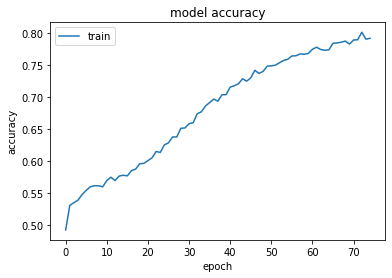

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

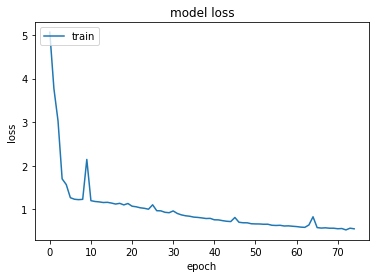

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AIS-CNN.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIS-CNN.model/assets


In [ ]:
with open('/content/drive/MyDrive/test.npy', 'wb') as f:
  np.save(f, final_input_test[1])

In [ ]:
print(final_input_test[1].shape)

(73, 4)


#Zone 19 and 20

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install dask[dataframe]

     |████████████████████████████████| 112kB 7.7MB/s 


In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
file = '/content/drive/MyDrive/All_Zone19_Shrunken_Data/*.csv'

cols = ["MMSI", "BaseDateTime", "LAT", "LON", "SOG", "COG", "VesselType"]
# read data frame from csv files
train_df = dd.read_csv(file, parse_dates = ['BaseDateTime'] ,dtype={'MMSI': 'uint32','VesselType': 'float16', 'LAT': 'float32', 'LON': 'float32', 'SOG': 'float32', 'COG': 'float32'},usecols = cols) 

train_df = train_df.compute()
print(train_df)

ValueError: ignored

In [ ]:
#/content/drive/MyDrive/All_Zone19_Shrunken_Data/AIS_2017_01.csv
file = '/content/drive/MyDrive/All_Zone19_Shrunken_Data/AIS_2015_12.csv'
cols = ["MMSI", "BaseDateTime", "LAT", "LON", "SOG", "COG", "VesselType"]
# read data frame from csv files
train_df = dd.read_csv(file, parse_dates = ['BaseDateTime'] ,dtype={'MMSI': 'uint32','VesselType': 'uint8', 'LAT': 'float32', 'LON': 'float32', 'SOG': 'float32', 'COG': 'float32'},usecols = cols) 
train_df = train_df.compute()
print(train_df)

             MMSI        BaseDateTime        LAT  ...   SOG         COG  VesselType
0       205519000 2015-12-17 23:29:08  20.555670  ...  10.3 -180.600006           0
1       205519000 2015-12-17 23:30:39  20.552799  ...  10.3 -181.600006           0
2       205519000 2015-12-17 23:31:48  20.550751  ...  10.3 -179.600006           0
3       205519000 2015-12-17 23:35:18  20.544121  ...  10.3 -179.600006           0
4       205519000 2015-12-17 23:51:17  20.514721  ...  10.2 -178.600006           0
...           ...                 ...        ...  ...   ...         ...         ...
276145  856583816 2015-12-28 12:19:14  41.274921  ...   8.7 -196.300003           3
276146  856583816 2015-12-30 20:48:25  41.388538  ...   0.1   27.299999           3
276147  856583816 2015-12-30 20:49:36  41.388538  ...   0.0   12.800000           3
276148  856583816 2015-12-30 20:50:56  41.388538  ...   0.0  -63.700001           3
276149  856583816 2015-12-30 20:54:36  41.388550  ...   0.0  -80.599998     

In [ ]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import time

file = '/content/drive/MyDrive/All_Zone19_Shrunken_Data/*.csv'
cols = ["MMSI", "BaseDateTime", "LAT", "LON", "SOG", "COG", "VesselType"]
# read data frame from csv files
train_df = dd.read_csv(file, parse_dates = ['BaseDateTime'] ,usecols = cols) 

train_df = train_df.compute()
print(train_df)

/usr/local/lib/python3.7/dist-packages/dask/core.py:121: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


ValueError: ignored

In [ ]:
import glob

import pandas as pd

# get data file names

local_path = r'/content/drive/MyDrive/All_Zone19_Shrunken_Data/'

filenames = glob.glob(local_path + "/*.csv")

dfs = [pd.read_csv(filename) for filename in filenames]


# if needed concatenate all data into one DataFrame

train_df = pd.concat(dfs, ignore_index=True)
print(train_df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
print(train_df.MMSI.nunique())

8608


In [ ]:
#Normalize Data
max_lat = train_df['Lat'].max()
max_lon = train_df['Long'].max()
max_sog = train_df['SOG'].max()
max_cog = 204.6999969482422
min_lat = train_df['Lat'].min()
min_lon = train_df['Long'].min()
min_sog = train_df['SOG'].min()
min_cog = train_df['COG'].min()

max_lat = train_df['Lat'].max()
min_lat = train_df['Lat'].min()
max_lon = train_df['Long'].max()
min_lon = train_df['Long'].min()
max_alt = train_df['Alt'].max()
min_alt = train_df['Alt'].min()

train_df['LAT'] = (train_df['LAT']- min_lat) / (max_lat - min_lat)
train_df['LON'] = (train_df['LON']- min_lon) / (max_lon - min_lon)
train_df['SOG'] = (train_df['SOG']- min_sog) / (max_sog - min_sog)
train_df['COG'] = (train_df['COG']- min_cog) / (max_cog - min_cog)
print(train_df)

             MMSI        BaseDateTime       LAT  ...       SOG       COG  VesselType
0       205421000 2015-01-18 19:22:01  0.731221  ...  0.615157  0.716972           6
1       205421000 2015-01-18 19:23:09  0.731223  ...  0.615157  0.716239           6
2       205421000 2015-01-18 19:28:30  0.731230  ...  0.613189  0.710623           6
3       205421000 2015-01-18 19:33:58  0.731240  ...  0.613189  0.716972           6
4       205421000 2015-01-18 19:38:21  0.731244  ...  0.616142  0.711844           6
...           ...                 ...       ...  ...       ...       ...         ...
694034  856583816 2017-12-30 16:11:37  0.748321  ...  0.634842  0.601709           3
694035  856583816 2017-12-30 16:16:01  0.748538  ...  0.639764  0.605617           3
694036  856583816 2017-12-30 16:21:31  0.748783  ...  0.638780  0.621490           3
694037  856583816 2017-12-30 16:31:10  0.749248  ...  0.558071  0.308913           3
694038  856583816 2017-12-30 16:34:40  0.749367  ...  0.560039  0

In [ ]:
#Get percentage of Vessel Types in each data frame
print(train_df['VesselType'].value_counts(normalize=True) * 100)

2    29.435414
4    17.053605
1    15.997825
5    15.498232
0     8.994376
3     7.785659
6     5.234890
Name: VesselType, dtype: float64


In [ ]:

train_df['BaseDateTime'] = train_df['BaseDateTime'].astype('int64')//1e9
print(train_df)

             MMSI  BaseDateTime       LAT  ...       SOG       COG  VesselType
0       205421000  1.421609e+09  0.731221  ...  0.615157  0.716972           6
1       205421000  1.421609e+09  0.731223  ...  0.615157  0.716239           6
2       205421000  1.421609e+09  0.731230  ...  0.613189  0.710623           6
3       205421000  1.421610e+09  0.731240  ...  0.613189  0.716972           6
4       205421000  1.421610e+09  0.731244  ...  0.616142  0.711844           6
...           ...           ...       ...  ...       ...       ...         ...
694034  856583816  1.514650e+09  0.748321  ...  0.634842  0.601709           3
694035  856583816  1.514651e+09  0.748538  ...  0.639764  0.605617           3
694036  856583816  1.514651e+09  0.748783  ...  0.638780  0.621490           3
694037  856583816  1.514651e+09  0.749248  ...  0.558071  0.308913           3
694038  856583816  1.514652e+09  0.749367  ...  0.560039  0.526740           3

[46123146 rows x 7 columns]


In [ ]:
print(train_df.dtypes)
train_df = train_df.reset_index(drop = True)

MMSI             uint32
BaseDateTime    float64
LAT             float32
LON             float32
SOG             float32
COG             float32
VesselType        uint8
dtype: object


In [ ]:
#turn train dataframe into a multi-dimensional numpy array
train_df = np.array(list(train_df.groupby('MMSI').apply(pd.DataFrame.to_numpy)))

print(train_df.shape)
train_count = train_df.shape[0]
print(train_count)

(13053,)
13053


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
train_input = pd.DataFrame(data = train_df[0], columns = ["MMSI","PosTime","Lat", "Lon", "Sog", "Cog", "Type"], index = None)
print(train_input)
print(train_input.dtypes)
#Convert Epoch to Datetime
train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='s')
print(train_input)

            MMSI       PosTime       Lat       Lon       Sog       Cog  Type
0    100000000.0  1.494734e+09  0.317733  0.999573  0.557087  0.043712   1.0
1    100000000.0  1.494734e+09  0.317681  0.999116  0.551181  0.040781   1.0
2    100000000.0  1.494734e+09  0.317626  0.998625  0.543307  0.045421   1.0
3    100000000.0  1.494735e+09  0.317421  0.996892  0.557087  0.029792   1.0
4    100000000.0  1.494735e+09  0.317226  0.995225  0.550197  0.049573   1.0
..           ...           ...       ...       ...       ...       ...   ...
372  100000000.0  1.495086e+09  0.338354  0.644418  0.563976  0.241514   1.0
373  100000000.0  1.495087e+09  0.338521  0.641795  0.566929  0.247619   1.0
374  100000000.0  1.495088e+09  0.338674  0.639408  0.562992  0.251526   1.0
375  100000000.0  1.495088e+09  0.338904  0.635803  0.559055  0.266422   1.0
376  100000000.0  1.495089e+09  0.339055  0.632900  0.548228  0.233211   1.0

[377 rows x 7 columns]
MMSI       float64
PosTime    float64
Lat        flo

In [ ]:
#Get Type
unique_species = int(train_input.Type[0])
train_input = train_input.drop('Type', axis = 1)
print(unique_species)

train_input = train_input.set_index('Time')
train_input = train_input.drop('PosTime', axis = 1)
train_input = train_input.drop('MMSI', axis = 1)
print(train_input)

1
                          Lat       Lon       Sog       Cog
Time                                                       
2017-05-14 03:50:59  0.317733  0.999573  0.557087  0.043712
2017-05-14 03:53:30  0.317681  0.999116  0.551181  0.040781
2017-05-14 03:56:33  0.317626  0.998625  0.543307  0.045421
2017-05-14 04:06:40  0.317421  0.996892  0.557087  0.029792
2017-05-14 04:16:18  0.317226  0.995225  0.550197  0.049573
...                       ...       ...       ...       ...
2017-05-18 05:46:34  0.338354  0.644418  0.563976  0.241514
2017-05-18 05:57:12  0.338521  0.641795  0.566929  0.247619
2017-05-18 06:06:50  0.338674  0.639408  0.562992  0.251526
2017-05-18 06:21:32  0.338904  0.635803  0.559055  0.266422
2017-05-18 06:33:41  0.339055  0.632900  0.548228  0.233211

[377 rows x 4 columns]


In [ ]:
#Resampling/Interpolating
norm_train_df = pd.DataFrame()
norm_train_df['Lat'] = train_input.Lat.resample('10T').last()
norm_train_df['Lon'] = train_input.Lon.resample('10T').last()
norm_train_df['Sog'] = train_input.Sog.resample('10T').last()
norm_train_df['Cog'] = train_input.Cog.resample('10T').last()
#norm_train_df['Lat'] = pd.to_numeric(norm_train_df['Lat'], errors='coerce')
#norm_train_df['Lon'] = pd.to_numeric(norm_train_df['Lon'], errors='coerce')
#norm_train_df['Alt'] = pd.to_numeric(norm_train_df['Alt'], errors='coerce')
norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
norm_train_df.reset_index(inplace = True)
norm_train_df = norm_train_df.iloc[0:73]
print(norm_train_df)

                  Time       Lat       Lon       Sog       Cog
0  2017-05-14 03:50:00  0.317626  0.998625  0.543307  0.045421
1  2017-05-14 04:00:00  0.317421  0.996892  0.557087  0.029792
2  2017-05-14 04:10:00  0.317226  0.995225  0.550197  0.049573
3  2017-05-14 04:20:00  0.316959  0.993477  0.553150  0.018315
4  2017-05-14 04:30:00  0.316786  0.992486  0.546260  0.014164
..                 ...       ...       ...       ...       ...
68 2017-05-14 15:10:00  0.325454  0.944539  0.412723  5.287957
69 2017-05-14 15:20:00  0.325542  0.944141  0.405443  5.591303
70 2017-05-14 15:30:00  0.325627  0.943757  0.398432  5.886051
71 2017-05-14 15:40:00  0.325709  0.943387  0.391689  6.172282
72 2017-05-14 15:50:00  0.325789  0.943030  0.385209  6.450079

[73 rows x 5 columns]


In [ ]:
#add type to label list
train_labels = []
train_labels.append(unique_species)
print(train_labels)
#convert dataframe to numpy
norm_train_df = norm_train_df.drop('Time', axis = 1)
norm_train_df = norm_train_df.to_numpy()
print(norm_train_df)
final_input_train = norm_train_df
print(final_input_train.shape)
final_input_train = np.reshape(final_input_train, (1,73,4))
print(final_input_train.shape)

[1]
[[3.17625612e-01 9.98625457e-01 5.43307066e-01 4.54212613e-02]
 [3.17421317e-01 9.96892273e-01 5.57086587e-01 2.97924224e-02]
 [3.17225933e-01 9.95225251e-01 5.50196826e-01 4.95726578e-02]
 [3.16958666e-01 9.93476868e-01 5.53149581e-01 1.83150191e-02]
 [3.16786468e-01 9.92486298e-01 5.46259820e-01 1.41636217e-02]
 [3.16427618e-01 9.90665436e-01 5.47244072e-01 9.27961711e-03]
 [3.16116956e-01 9.89181661e-01 5.52081264e-01 9.38453360e-02]
 [3.15944284e-01 9.88399506e-01 5.56102335e-01 5.86082833e-03]
 [3.15817833e-01 9.87791717e-01 5.56102335e-01 4.15139692e-03]
 [3.15473497e-01 9.86114502e-01 5.49212575e-01 9.98046398e-01]
 [3.15231621e-01 9.84896362e-01 5.44291317e-01 1.31868357e-02]
 [3.15001935e-01 9.83731568e-01 5.43307066e-01 9.98046398e-01]
 [3.14710017e-01 9.82313885e-01 5.46663191e-01 8.96395599e-01]
 [3.14478874e-01 9.81128693e-01 5.53149581e-01 2.44215160e-04]
 [3.14368039e-01 9.80584443e-01 5.53149581e-01 1.56288389e-02]
 [3.14155549e-01 9.79949951e-01 5.31496048e-01 9.39

In [ ]:
for j in range(1,13053):
    try:
        print(j)
        train_input = pd.DataFrame(data = train_df[j], columns = ["MMSI","PosTime","Lat", "Lon", "Sog", "Cog", "Type"], index = None)
        train_input['Time'] = pd.to_datetime(train_input['PosTime'],unit='s')
        unique_species = int(train_input.Type[0])
        train_input = train_input.set_index('Time')
        train_input = train_input.drop('PosTime', axis = 1)
        train_input = train_input.drop('MMSI', axis = 1)
        train_input = train_input.drop('Type', axis = 1)
        norm_train_df = pd.DataFrame()
        norm_train_df['Lat'] = train_input.Lat.resample('10T').last()
        norm_train_df['Lon'] = train_input.Lon.resample('10T').last()
        norm_train_df['Sog'] = train_input.Sog.resample('10T').last()
        norm_train_df['Cog'] = train_input.Cog.resample('10T').last()
        norm_train_df = norm_train_df.interpolate(method='spline', order=3, s=0.)
        norm_train_df.reset_index(inplace = True)
        norm_train_df = norm_train_df.iloc[0:73]
        norm_train_df = norm_train_df.drop('Time', axis = 1)
        norm_train_df = norm_train_df.to_numpy()
        norm_train_df = np.reshape(norm_train_df, (1,73,4))
        final_input_train = np.append(final_input_train, norm_train_df, axis = 0)
        train_labels.append(unique_species)
    except:
        pass
        
print(final_input_train.shape)
print(len(train_labels))

Streaming output truncated to the last 5000 lines.
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244

In [ ]:
with open('/content/drive/MyDrive/final_input_train.npy', 'wb') as f:
  np.save(f, final_input_train)

In [ ]:
with open('/content/drive/MyDrive/train_labels.npy', 'wb') as g:
  np.save(g, train_labels)

In [ ]:
final_input_test = final_input_train[8869:]
arr = list(range(8869,final_input_train.shape[0] ))
print(final_input_test.shape)

final_input_train = np.delete(final_input_train, arr, 0)
print(final_input_train.shape)

test_labels = train_labels[8869:]
print(len(test_labels))

train_labels_final = train_labels[:8869]
print(len(train_labels_final))

unique = list(dict.fromkeys(test_labels))
unique2 = list(dict.fromkeys(train_labels_final))
print(unique)
print(unique2)



(3801, 73, 4)
(8869, 73, 4)
3801
8869
[0, 4, 6, 3, 2, 5, 1]
[1, 5, 3, 2, 0, 6, 4]


In [ ]:
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels,num_classes = 7)
train_labels_final = to_categorical(train_labels_final,num_classes = 7)
print(len(test_labels))
print(len(train_labels_final))

train_labels_final = np.array(train_labels_final)
test_labels = np.array(test_labels)
print(train_labels_final)

3801
8869
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fit and evaluate a model
def evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels):
    verbose, epochs, batch_size = 2, 25, 16
    n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 7
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
    # evaluate model
    _, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
    return accuracy


# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = np.mean(scores), np.std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=2):
    # load data
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(final_input_train, train_labels_final, final_input_test, test_labels)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

run_experiment()

Epoch 1/25
448/448 - 4s - loss: 5.2046 - accuracy: 0.4721
Epoch 2/25
448/448 - 3s - loss: 5.0563 - accuracy: 0.5105
Epoch 3/25
448/448 - 3s - loss: 2.1227 - accuracy: 0.5308
Epoch 4/25
448/448 - 3s - loss: 1.5243 - accuracy: 0.5360
Epoch 5/25
448/448 - 3s - loss: 1.2815 - accuracy: 0.5388
Epoch 6/25
448/448 - 3s - loss: 1.2785 - accuracy: 0.5430
Epoch 7/25
448/448 - 3s - loss: 1.2532 - accuracy: 0.5448
Epoch 8/25
448/448 - 3s - loss: 1.2366 - accuracy: 0.5503
Epoch 9/25
448/448 - 3s - loss: 1.2415 - accuracy: 0.5465
Epoch 10/25
448/448 - 3s - loss: 1.2313 - accuracy: 0.5532
Epoch 11/25
448/448 - 3s - loss: 1.2235 - accuracy: 0.5484
Epoch 12/25
448/448 - 3s - loss: 1.2464 - accuracy: 0.5539
Epoch 13/25
448/448 - 3s - loss: 1.2045 - accuracy: 0.5604
Epoch 14/25
448/448 - 3s - loss: 1.1829 - accuracy: 0.5635
Epoch 15/25
448/448 - 3s - loss: 1.1817 - accuracy: 0.5641
Epoch 16/25
448/448 - 3s - loss: 1.1596 - accuracy: 0.5722
Epoch 17/25
448/448 - 3s - loss: 1.1775 - accuracy: 0.5699
Epoch 

In [ ]:
# fit and evaluate a model
verbose, epochs, batch_size = 2, 100, 16
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 7
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=1)

Epoch 1/100
278/278 - 3s - loss: 4.7521 - accuracy: 0.4494
Epoch 2/100
278/278 - 2s - loss: 3.1505 - accuracy: 0.4778
Epoch 3/100
278/278 - 2s - loss: 15.6767 - accuracy: 0.4818
Epoch 4/100
278/278 - 2s - loss: 3.9383 - accuracy: 0.5001
Epoch 5/100
278/278 - 2s - loss: 3.9408 - accuracy: 0.5067
Epoch 6/100
278/278 - 2s - loss: 1.9189 - accuracy: 0.5211
Epoch 7/100
278/278 - 2s - loss: 1.6874 - accuracy: 0.5249
Epoch 8/100
278/278 - 2s - loss: 1.4553 - accuracy: 0.5306
Epoch 9/100
278/278 - 2s - loss: 1.4859 - accuracy: 0.5335
Epoch 10/100
278/278 - 2s - loss: 1.3555 - accuracy: 0.5366
Epoch 11/100
278/278 - 2s - loss: 1.3338 - accuracy: 0.5411
Epoch 12/100
278/278 - 2s - loss: 1.3146 - accuracy: 0.5432
Epoch 13/100
278/278 - 2s - loss: 1.4258 - accuracy: 0.5461
Epoch 14/100
278/278 - 2s - loss: 1.2733 - accuracy: 0.5441
Epoch 15/100
278/278 - 2s - loss: 1.2873 - accuracy: 0.5466
Epoch 16/100
278/278 - 2s - loss: 1.2643 - accuracy: 0.5461
Epoch 17/100
278/278 - 2s - loss: 1.2543 - accur

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras
# fit and evaluate a model
verbose, epochs, batch_size = 2, 75, 16
n_timesteps, n_features, n_outputs = final_input_train.shape[1], final_input_train.shape[2], 7
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit network
history =  model.fit(final_input_train, train_labels_final, epochs=epochs, batch_size=batch_size, verbose=verbose, shuffle = True)
# evaluate model
_, accuracy = model.evaluate(final_input_test, test_labels, batch_size=batch_size, verbose=0)
print(accuracy *100)

Epoch 1/75
555/555 - 11s - loss: 5.0650 - accuracy: 0.4930
Epoch 2/75
555/555 - 11s - loss: 3.7707 - accuracy: 0.5311
Epoch 3/75
555/555 - 11s - loss: 3.0294 - accuracy: 0.5353
Epoch 4/75
555/555 - 10s - loss: 1.6971 - accuracy: 0.5393
Epoch 5/75
555/555 - 10s - loss: 1.5664 - accuracy: 0.5481
Epoch 6/75
555/555 - 11s - loss: 1.2644 - accuracy: 0.5546
Epoch 7/75
555/555 - 10s - loss: 1.2287 - accuracy: 0.5602
Epoch 8/75
555/555 - 10s - loss: 1.2195 - accuracy: 0.5617
Epoch 9/75
555/555 - 10s - loss: 1.2267 - accuracy: 0.5617
Epoch 10/75
555/555 - 10s - loss: 2.1430 - accuracy: 0.5600
Epoch 11/75
555/555 - 11s - loss: 1.1962 - accuracy: 0.5699
Epoch 12/75
555/555 - 11s - loss: 1.1772 - accuracy: 0.5750
Epoch 13/75
555/555 - 11s - loss: 1.1682 - accuracy: 0.5699
Epoch 14/75
555/555 - 11s - loss: 1.1536 - accuracy: 0.5768
Epoch 15/75
555/555 - 11s - loss: 1.1581 - accuracy: 0.5781
Epoch 16/75
555/555 - 10s - loss: 1.1411 - accuracy: 0.5772
Epoch 17/75
555/555 - 10s - loss: 1.1184 - accura

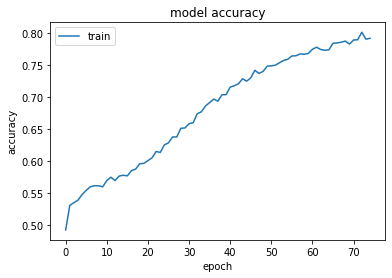

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

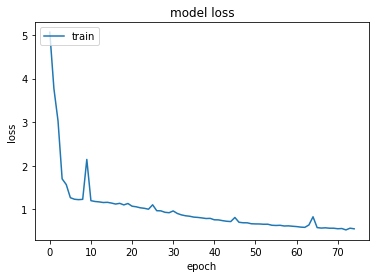

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AIS-CNN.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIS-CNN.model/assets


In [ ]:
with open('/content/drive/MyDrive/test.npy', 'wb') as f:
  np.save(f, final_input_test[1])

In [ ]:
print(final_input_test[1].shape)

(73, 4)
